# Exercise 1: NumPy array Indexing/Slicing

1.1) In this exercise, we will use the iris dataset. Load the "iris.csv" using the appropriate method for this file type (use the new functions from the package).

In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Romeu\\OneDrive\\Documentos\\GitHub\\SIB\\datasets\\iris\\iris.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


1.2) Select the penultimate independent variable. What is the dimension of the resulting array?

In [2]:
penultimate_variable = df.iloc[:, -2]
print(penultimate_variable.shape)

(150,)


1.3) Select the last 10 samples from the iris dataset. What is the mean of the last 10 samples for each independent variable/feature?

In [3]:
last_10 = df.iloc[-10:, :-1]
means = last_10.mean(axis=0)
print(means)

sepal_length    6.45
sepal_width     3.03
petal_length    5.33
petal_width     2.17
dtype: float64


1.4) Select all samples from the dataset with values less than or equal to 6 for all independent variables/features. How many samples do you obtain?

In [4]:
features = df.iloc[:, :-1]
mask = (features <= 6).all(axis=1)
filtered_samples = df[mask]
print(filtered_samples.shape[0])

89


1.5) Select all samples with a class/label different from 'Iris-setosa'. How many samples do you obtain?

In [5]:
not_setosa = df[df.iloc[:, -1] != 'Iris-setosa']
print(not_setosa.shape[0])

100


# Exercise 2: Add examples of how to use these methods to the script/notebook of Exercise 1

## Cleaning Methods

dropna

In [6]:
import numpy as np
from si.data.dataset import Dataset

# Convert DataFrame to NumPy arrays
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Add a NaN value for demonstration (so dropna has an effect)
X[0, 0] = np.nan   # Set first feature of first sample to NaN

# Create Dataset object
ds = Dataset(X, y)
print("Before dropna:", ds.X.shape, ds.y.shape)

# Apply your custom dropna method
ds.dropna()
print("After dropna:", ds.X.shape, ds.y.shape)

Before dropna: (150, 4) (150,)
After dropna: (149, 4) (149,)


fillna

In [7]:
ds_nan2 = Dataset(np.copy(X), np.copy(y))
ds_nan2.X[0,1] = np.nan  # Add a NaN for demonstration
ds_nan2.fillna("mean")
print("After fillna('mean') on first feature of first sample:")
print(ds_nan2.X[0,:])

After fillna('mean') on first feature of first sample:
[5.84832215 3.05100671 1.4        0.2       ]


remove_by_index

In [8]:
ds_rem = Dataset(np.copy(X), np.copy(y))
ds_rem.remove_by_index(0)
print("After remove_by_index(0):")
print(ds_rem.X.shape, ds_rem.y.shape)


After remove_by_index(0):
(149, 4) (149,)


# Exercise 3: Test the SelectPercentile class in a Jupyter notebook using the "iris.csv" dataset (classification).

 Load data

In [9]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Romeu\\OneDrive\\Documentos\\GitHub\\SIB\\datasets\\iris\\iris.csv")

# Separate features and target
X = df.iloc[:, :-1].values   # All columns except last
y = df.iloc[:, -1].values    # Last column (class labels)

Import and Run SelectPercentile

In [11]:
from si.feature_selection.select_percentile import SelectPercentile
from sklearn.feature_selection import f_classif

# Create selector (e.g., select top 50% features)
selector = SelectPercentile(score_func=f_classif, percentile=50)

# Fit on the data
selector.fit(X, y)

# Transform the data
X_selected = selector.transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_selected.shape)


Original shape: (150, 4)
Transformed shape: (150, 2)


Fit and Transform

In [12]:
# Create selector (e.g., select top 50% features)
selector = SelectPercentile(score_func=f_classif, percentile=50)

# Fit on the data
selector.fit(X, y)

# Transform the data
X_selected = selector.transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_selected.shape)


Original shape: (150, 4)
Transformed shape: (150, 2)


Results

In [14]:
# Boolean mask
support_mask = selector.get_support()
print("Support mask:", support_mask)

# Indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

Support mask: [False False  True  True]
Selected feature indices: [2 3]


F-Values

In [15]:
print("F-values for features:", selector.F)
print("Selected F-values:", selector.F[support_mask])

F-values for features: [ 119.26450218   47.3644614  1179.0343277   959.32440573]
Selected F-values: [1179.0343277   959.32440573]


# Exercise 5: Implement the PCA Class

5.2) Test the PCA class in a jupyter notebook using the iris.csv dataset (classificação).

In [1]:
import pandas as pd

# Load the dataset (adjust path if needed)
df = pd.read_csv("C:/Users/Romeu/OneDrive/Documentos/GitHub/SIB/datasets/iris/iris.csv")

# Extract features (X) and labels (y)
X = df.iloc[:, :-1].values  # All but last column
y = df.iloc[:, -1].values   # Last column
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


PCA

In [3]:
from si.decomposition.pca import PCA  # Update to match your project structure
# Instantiate PCA to reduce to 2 components
pca = PCA(n_components=2)

# Fit PCA to the data
pca._fit(X)

# Transform the data (reduce dimensions)
X_reduced = pca._transform(X)

print("Reduced shape:", X_reduced.shape)

print("Mean used for centering:", pca.mean)
print("Principal components (each row is a component):\n", pca.components)
print("Explained variance by each component:", pca.explained_variance)

Reduced shape: (150, 2)
Mean used for centering: [5.84333333 3.054      3.75866667 1.19866667]
Principal components (each row is a component):
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Explained variance by each component: [0.94577144 0.05422856]


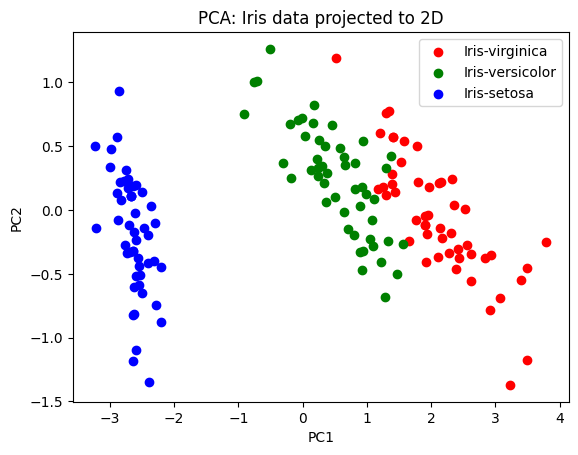

In [4]:
import matplotlib.pyplot as plt

# Color map for the labels
unique_labels = list(set(y))
colors = ['r', 'g', 'b']

for label, color in zip(unique_labels, colors):
    idx = y == label
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=label)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Iris data projected to 2D')
plt.legend()
plt.show()
